Acurácia: 1.0


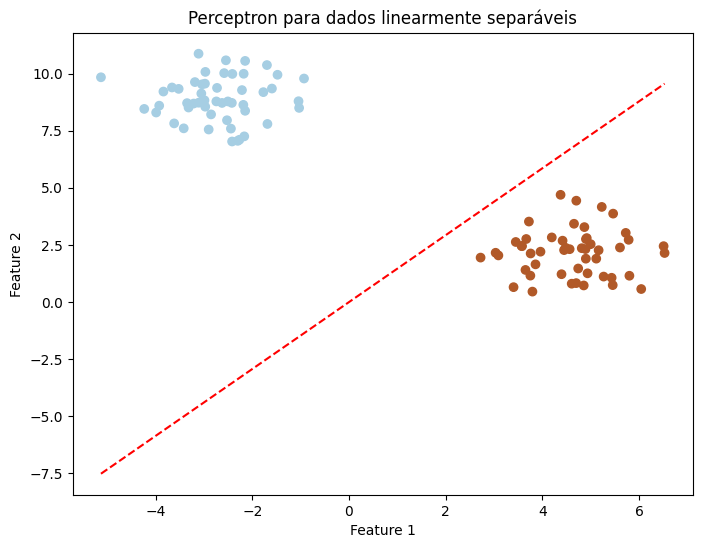

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Criar conjunto de dados linearmente separável
X, y = make_blobs(n_samples=100, centers=2, random_state=42)

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Criar e treinar o perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# Fazer previsões
y_pred = perceptron.predict(X_test)

# Calcular acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# Plotar o conjunto de dados e a linha de decisão do perceptron
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plotar a linha de decisão
x_values = np.array([X[:, 0].min(), X[:, 0].max()])
y_values = -(perceptron.coef_[0][0] * x_values + perceptron.intercept_) / perceptron.coef_[0][1]
plt.plot(x_values, y_values, '--', color='red')
plt.title('Perceptron para dados linearmente separáveis')
plt.show()


Acurácia: 0.32


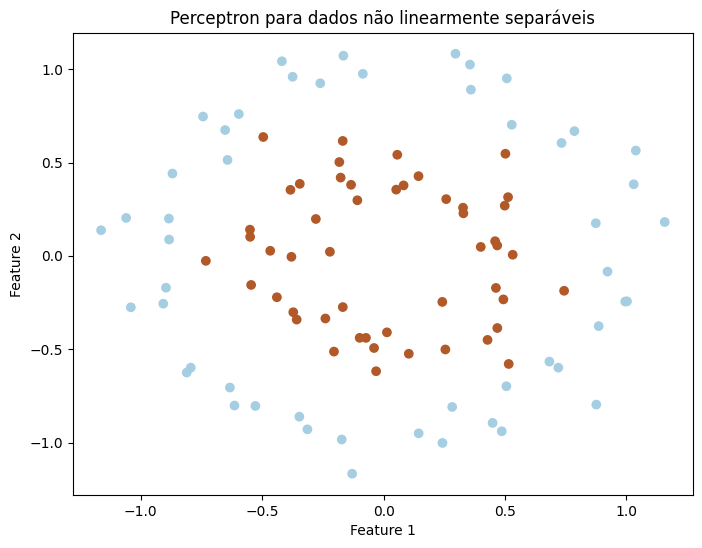

In [6]:
# Criar conjunto de dados não linearmente separável
X, y = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42)

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Criar e treinar o perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# Fazer previsões
y_pred = perceptron.predict(X_test)

# Calcular acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# Plotar o conjunto de dados e a linha de decisão do perceptron
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Não é possível plotar uma linha de decisão para o perceptron neste caso

plt.title('Perceptron para dados não linearmente separáveis')
plt.show()


In [2]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Iniciando os pesos com zeros
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Treinamento do perceptron
        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.step_function(linear_output)
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = np.where(linear_output >=0, 1, 0)
        return y_predicted
    
    def step_function(self, x):
        return 1 if x >= 0 else 0

In [3]:
# Criando o conjunto de dados linearmente separável
X, y = make_blobs(n_samples=100, centers=2, random_state=42)

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Criando e treinando o perceptron
perceptron = Perceptron(learning_rate=0.01, n_iterations=1000)
perceptron.fit(X_train, y_train)

# Fazendo previsões e calculando a acurácia
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

Acurácia: 1.0
